In [1]:
# STEP 1: Imports
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Check version
print(tf.__version__)

2.19.0


In [21]:
#directory
source_dir= r'OneDrive/Desktop/Git-pository/Project-I/RiceLeafDisease/archive/RiceLeafsDisease'
train_dir = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\train"
val_dir   = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\validation"
test_dir  = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\test"

In [23]:
import os
print(os.getcwd())


C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\Mobilenetv2


In [25]:
import os

print("Train exists:", os.path.exists(train_dir))
print("Train subfolders:", os.listdir(train_dir) if os.path.exists(train_dir) else "❌ Path not found")


Train exists: True
Train subfolders: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


In [27]:
# STEP 3: Load the Datasets
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(train_dir,
                                        image_size=IMG_SIZE,
                                        batch_size=BATCH_SIZE,
                                        label_mode='categorical')

val_ds = image_dataset_from_directory(val_dir,
                                      image_size=IMG_SIZE,
                                      batch_size=BATCH_SIZE,
                                      label_mode='categorical')

test_ds = image_dataset_from_directory(test_dir,
                                       image_size=IMG_SIZE,
                                       batch_size=BATCH_SIZE,
                                       label_mode='categorical')

# Get class names
class_names = train_ds.class_names
print("Classes:", class_names)


Found 894 files belonging to 3 classes.
Found 225 files belonging to 3 classes.
Found 195 files belonging to 3 classes.
Classes: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


In [31]:
# STEP 4: Optimize Dataset Pipeline
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [33]:
# STEP 5: Build MobileNetV2 Model
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False  # Freeze base model

# Build top model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=IMG_SIZE + (3,)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\neha_\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [83]:
# STEP 6: Train the Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 38s 912ms/step - accuracy: 0.2718 - loss: 1.7668 - val_accuracy: 0.3378 - val_loss: 1.3845
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 751ms/step - accuracy: 0.3255 - loss: 1.3582 - val_accuracy: 0.3733 - val_loss: 1.1237
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 748ms/step - accuracy: 0.4085 - loss: 1.1155 - val_accuracy: 0.4756 - val_loss: 0.9403
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 764ms/step - accuracy: 0.5616 - loss: 0.9251 - val_accuracy: 0.6000 - val_loss: 0.8095
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 777ms/step - accuracy: 0.6222 - loss: 0.8170 - val_accuracy: 0.6800 - val_loss: 0.7098
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 770ms/step - accuracy: 0.7152 - loss: 0.6835 - val_accuracy: 0.7156 - val_loss: 0.6342
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 743ms/step - accuracy: 0.7103 - loss: 0.6658 - val_accuracy: 0.7778 - val_loss: 0.5729
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 754ms/step - accuracy: 0.7842 - loss: 0.5587 - val_accu

In [85]:
# STEP 7: Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 475ms/step - accuracy: 0.8690 - loss: 0.4550
Test Accuracy: 86.15%


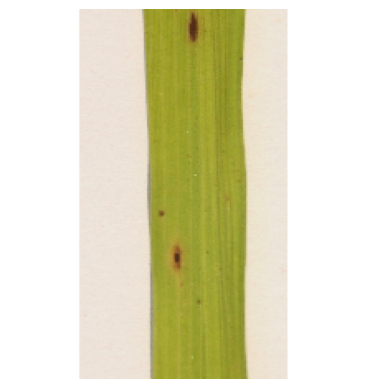

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted: brown_spot
Actual: brown_spot


In [79]:
# STEP 8: Predict a Sample Image
import random

for images, labels in test_ds.take(1):
    idx = random.randint(0, len(images) - 1)
    img = images[idx]
    label = labels[idx]

    plt.imshow(img.numpy().astype("uint8"))
    plt.axis("off")
    plt.show()

    img_array = tf.expand_dims(img, 0)  # Add batch dim
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    true_class = class_names[np.argmax(label)]

    print(f"Predicted: {predicted_class}")
    print(f"Actual: {true_class}")


In [81]:
# STEP 9: Save Model to .h5 file
model.save("rice_leaf_model.keras")
print("Model saved as rice_leaf_model.keras")


Model saved as rice_leaf_model.keras


In [82]:
model_path = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\Mobilenetv2\rice_leaf_model.keras"
model = tf.keras.models.load_model(model_path)


In [85]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\train",
    subset="training", validation_split=0.2, seed=123,
    image_size=(224, 224), batch_size=32
)

class_names = train_ds.class_names
print("Class order used during training:", class_names)


Found 894 files belonging to 3 classes.
Using 716 files for training.
Class order used during training: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


In [87]:
print("Loss function:", model.loss)
print("Metrics:", model.metrics)
print("Compiled metrics (names):", model.metrics_names)


Loss function: categorical_crossentropy
Metrics: [<Mean name=loss>, <CompileMetrics name=compile_metrics>]
Compiled metrics (names): ['loss', 'compile_metrics']
